In [1]:
### imports ###
import pygmt
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.image as mpimg 
from mpl_toolkits.basemap import Basemap

import pandas as pd

%matplotlib inline
%matplotlib widget

In [3]:
# Major tectonic blocks and faults are marked by black lines (after Styron et al. (2010) and Taylor and An Yin (2009))
# https://github.com/HimaTibetMap/HimaTibetMap/tree/master
# Styron, R., Taylor, M., and Okoronkwo, K., 2010, HimaTibetMap-1.0: new ‘web-2.0’ online database of active structures from the Indo-Asian collision, Eos, vol.91 no. 20.
# Taylor, Michael, and An Yin, 2009, "Active structures of the Himalayan-Tibetan orogen and their relationships to earthquake distribution, contemporary strain field, and Cenozoic volcanism." Geosphere vol. 5, no. 3, pp 199-214.
# gem_active_faults.gmt https://github.com/GEMScienceTools/gem-global-active-faults
# Slab contours are from the slab model of Hayes et al. (2018).
# Hayes, G., 2018, Slab2 - A Comprehensive Subduction Zone Geometry Model: U.S. Geological Survey data release, https://doi.org/10.5066/F7PV6JNV. 

# Seismicity from the Harvard CMT cffatalogue (Dziewonski et al. (1981), Ekstr ̈om et al. (2012), https://www.globalcmt.org/.
# InSAR DURATION ONLY 20160309 20240710


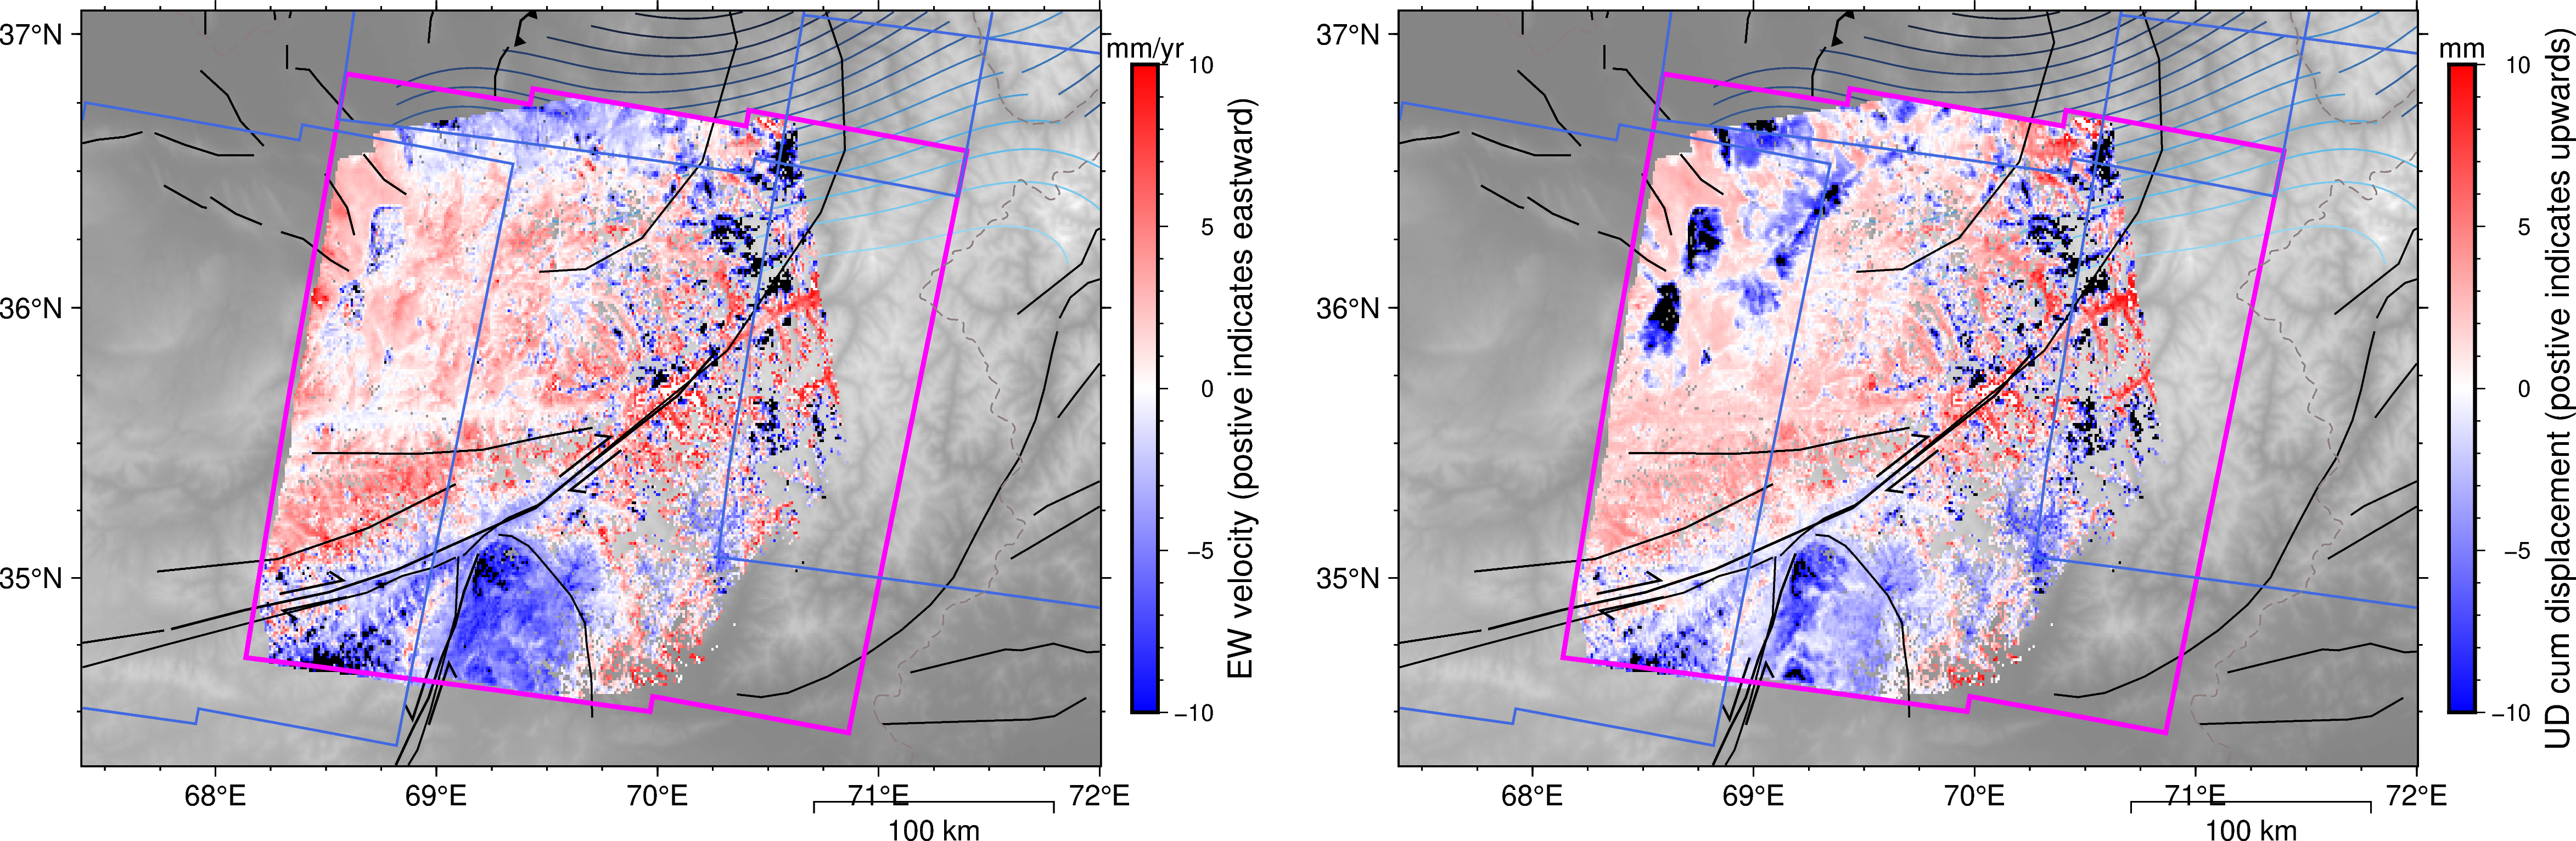

In [42]:
### GMT basemap ###
import os
dir = "/Users/rochelle/Documents/GitHub/Leeds-Research-Internship/"
os.chdir(dir)

###########################################
## Specify coords
# llcrnrlat,llcrnrlon, urcrnrlat, urcrnrlon
# are the lat/lon values of the lower left and upper right corners of the map

llcrnrlon=67.4 # lower left corner longitude 
llcrnrlat=34.3 # lower left corner latitude
urcrnrlon=72 # upper right corner longitude
urcrnrlat=37.08 # upper right corner latitude


proj_scale_w = 18 # specify projection scale (width)
proj_scale_unit = "c" # choose between c (cm) and i (inches)
# 17.78c = 7i

proj_subplot_scale = 2.3

meca_trans = 22 # meca transparency
meca_scale = "0.4c" # meca scale

# InSAR_tif =
# InSAR_NetCDF =

EW_tif = "bin/metadata/EW.geo.tif"
UD_tif = "bin/metadata/UD.geo.tif"
###########################################

centerlon = (urcrnrlon - llcrnrlon)/2 + llcrnrlon # midpoints
centerlat = (urcrnrlat - llcrnrlat)/2 + llcrnrlat
region=[llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat]


fig = pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE="plain", FONT="Helvetica") # figure config (borders)

with fig.subplot(
    nrows=1, ncols=2, figsize=("%s%s" % (proj_scale_w*2, proj_scale_unit)), margins="2c"
):
     with fig.set_panel(panel=0):
                
        fig.coast(region=region,\
                projection="M?",\
                water="white", land="grey", shorelines="1/0.5p",\
                frame=["WSne", "a1f0.25"])

                # Mercator
                # a2f0.5 --> major ticks every 2 and minor ticks every 0.5
                # use ? for subplot so it automatically determines map width

        grid = pygmt.datasets.load_earth_relief("30s", registration="gridline", region=region)

        fig.grdimage(grid=grid, cmap="bin/cpt/custom/seabluelandgrey.cpt")
        # fig.grdimage(grid=grid, cmap="geo")

        ## plot slab2.0 here
        fig.plot(data="bin/hin_slab2_dep_02.24.18_contours.in", pen=f"0.65p", cmap="bin/cpt/abyss_slab2.0") # Hindu Kush, bounding coords 66 74 40 34
        fig.plot(data="bin/pam_slab2_dep_02.26.18_contours.in", pen=f"0.65p", cmap="bin/cpt/abyss_slab2.0") # Pamir, bounding coords 68 78 41 35

        #######################
        ## plotting EW
        pygmt.makecpt(output="bin/cpt/polar_LOSdecomp", series=[-10, 10], cmap="bin/cpt/GMT_supported/polar.cpt")
                    # redefine scale + inverse
                    # stored in local sesh

                                                                
        fig.grdimage(grid=EW_tif, nan_transparent = True, transparency = 0, cmap="bin/cpt/polar_LOSdecomp")

        #######################
        '''
        ## plotting HarvardCMT earthquakes by fault style 20160309 20240710
        fig.meca(
            spec="bin/Harvard_CMT_InSAR/Harvard_CMT_InSAR_thrust_dropname.xy",
            convention="mt", scale=meca_scale,
            cmap="bin/cpt/custom/blue.cpt",
            extensionfill="cornsilk",
            # Draw a 0.5 points thick dark gray ("gray30") solid outline via
            # the pen parameter [Default is "0.25p,black,solid"]
            pen="thinnest,gray30,solid", transparency=meca_trans,
        )

        fig.meca(
            spec="bin/Harvard_CMT_InSAR/Harvard_CMT_InSAR_ss_dropname.xy",
            convention="mt", scale=meca_scale,
            cmap="bin/cpt/custom/green.cpt",
            extensionfill="cornsilk",
            pen="thinnest,gray30,solid", transparency=meca_trans,
        )

        fig.meca(
            spec="bin/Harvard_CMT_InSAR/Harvard_CMT_InSAR_normal_dropname.xy",
            convention="mt", scale=meca_scale,
            cmap="bin/cpt/custom/red.cpt",
            extensionfill="cornsilk",
            pen="thinnest,gray30,solid", transparency=meca_trans,
        )
        '''



        ## plotting faults
        # https://www.pygmt.org/dev/gallery/lines/linefronts.html
        fig.plot(data="bin/faults/HimaTibetMap.gmt", pen=f"0.7p,black") # all faults
        fig.plot(data="bin/faults/gem_active_faults.gmt", pen=f"0.7p,black") # gem
        fig.plot(data="bin/faults/normal.gmt", style="f1c/0.13c+l+b", pen=f"0.95p,black", fill="black") # normal
        fig.plot(data="bin/faults/thrust.gmt", style="f1c/0.13c+l+t", pen=f"0.95p,black", fill="black") # thrust
        fig.plot(data="bin/faults/dextral.gmt", style="f5c/1c+r+s45+o2.25c", pen=f"0.95p,black", fill="black") # dextral (right)
        fig.plot(data="bin/faults/sinistral.gmt", style="f5c/1c+l+s45+o2.25c", pen=f"0.95p,black", fill="black") # sinistral (left)


        ## plotting poly.txt

        ### Descending ###
        fig.plot(data="bin/metadata/descending/078D_05435_131313-poly.txt", pen=f"2p,magenta") # 078D_05435_131313
        fig.plot(data="bin/metadata/descending/005D_05398_131313-poly.txt", pen=f"1p,royalblue") # 005D_05398_131313
        fig.plot(data="bin/metadata/descending/151D_05440_131313-poly.txt", pen=f"1p,royalblue") # 151D_05440_131313
        fig.plot(data="bin/metadata/descending/078D_05237_131313-poly.txt", pen=f"1p,royalblue") # 078D_05237_131313
        fig.plot(data="bin/metadata/descending/005D_05199_131313-poly.txt", pen=f"1p,royalblue") # 005D_05199_131313
        fig.plot(data="bin/metadata/descending/107D_05290_121313-poly.txt", pen=f"1p,royalblue") # 107D_05290_121313
        fig.plot(data="bin/metadata/descending/107D_05092_141313-poly.txt", pen=f"1p,royalblue") # 107D_05092_141313-poly.txt


        ## legends and stuff

        fig.coast(map_scale="g71.25/34.14+w100k", shorelines="1/0.5p", borders="1/0.6p, mistyrose4,-")
        fig.colorbar(
            cmap="bin/cpt/polar_LOSdecomp", frame=["xa5f1+lEW velocity (postive indicates eastward)", "y+lmm/yr"],
            # offset (+o) by 0.5 cm horizontally and 0.8 cm vertically from anchor
            # point, and plotted horizontally (+h)
            position="JCR+o0.5/0c+w10c"
        )

        ###########################################################

     with fig.set_panel(panel=1):

        fig.coast(region=region,\
                projection="M?",\
                water="white", land="grey", shorelines="1/0.5p",\
                frame=["WSne", "a1f0.25"])

                # Mercator
                # a2f0.5 --> major ticks every 2 and minor ticks every 0.5

        grid = pygmt.datasets.load_earth_relief("30s", registration="gridline", region=region)

        fig.grdimage(grid=grid, cmap="bin/cpt/custom/seabluelandgrey.cpt")
        # fig.grdimage(grid=grid, cmap="geo")

        ## plot slab2.0 here
        fig.plot(data="bin/hin_slab2_dep_02.24.18_contours.in", pen=f"0.65p", cmap="bin/cpt/abyss_slab2.0") # Hindu Kush, bounding coords 66 74 40 34
        fig.plot(data="bin/pam_slab2_dep_02.26.18_contours.in", pen=f"0.65p", cmap="bin/cpt/abyss_slab2.0") # Pamir, bounding coords 68 78 41 35

        #######################
        ## plotting UD
                                             
        fig.grdimage(grid=UD_tif, nan_transparent = True, transparency = 0, cmap="bin/cpt/polar_LOSdecomp")

        #######################
        '''
        ## plotting HarvardCMT earthquakes by fault style 20160309 20240710
        fig.meca(
            spec="bin/Harvard_CMT_InSAR/Harvard_CMT_InSAR_thrust_dropname.xy",
            convention="mt", scale=meca_scale,
            cmap="bin/cpt/custom/blue.cpt",
            extensionfill="cornsilk",
            # Draw a 0.5 points thick dark gray ("gray30") solid outline via
            # the pen parameter [Default is "0.25p,black,solid"]
            pen="thinnest,gray30,solid", transparency=meca_trans,
        )

        fig.meca(
            spec="bin/Harvard_CMT_InSAR/Harvard_CMT_InSAR_ss_dropname.xy",
            convention="mt", scale=meca_scale,
            cmap="bin/cpt/custom/green.cpt",
            extensionfill="cornsilk",
            pen="thinnest,gray30,solid", transparency=meca_trans,
        )

        fig.meca(
            spec="bin/Harvard_CMT_InSAR/Harvard_CMT_InSAR_normal_dropname.xy",
            convention="mt", scale=meca_scale,
            cmap="bin/cpt/custom/red.cpt",
            extensionfill="cornsilk",
            pen="thinnest,gray30,solid", transparency=meca_trans,
        )
        '''



        ## plotting faults
        # https://www.pygmt.org/dev/gallery/lines/linefronts.html
        fig.plot(data="bin/faults/HimaTibetMap.gmt", pen=f"0.7p,black") # all faults
        fig.plot(data="bin/faults/gem_active_faults.gmt", pen=f"0.7p,black") # gem
        fig.plot(data="bin/faults/normal.gmt", style="f1c/0.13c+l+b", pen=f"0.95p,black", fill="black") # normal
        fig.plot(data="bin/faults/thrust.gmt", style="f1c/0.13c+l+t", pen=f"0.95p,black", fill="black") # thrust
        fig.plot(data="bin/faults/dextral.gmt", style="f5c/1c+r+s45+o2.25c", pen=f"0.95p,black", fill="black") # dextral (right)
        fig.plot(data="bin/faults/sinistral.gmt", style="f5c/1c+l+s45+o2.25c", pen=f"0.95p,black", fill="black") # sinistral (left)


        ## plotting poly.txt

        ### Descending ###
        fig.plot(data="bin/metadata/descending/078D_05435_131313-poly.txt", pen=f"2p,magenta") # 078D_05435_131313
        fig.plot(data="bin/metadata/descending/005D_05398_131313-poly.txt", pen=f"1p,royalblue") # 005D_05398_131313
        fig.plot(data="bin/metadata/descending/151D_05440_131313-poly.txt", pen=f"1p,royalblue") # 151D_05440_131313
        fig.plot(data="bin/metadata/descending/078D_05237_131313-poly.txt", pen=f"1p,royalblue") # 078D_05237_131313
        fig.plot(data="bin/metadata/descending/005D_05199_131313-poly.txt", pen=f"1p,royalblue") # 005D_05199_131313
        fig.plot(data="bin/metadata/descending/107D_05290_121313-poly.txt", pen=f"1p,royalblue") # 107D_05290_121313
        fig.plot(data="bin/metadata/descending/107D_05092_141313-poly.txt", pen=f"1p,royalblue") # 107D_05092_141313-poly.txt


        ## legends and stuff

        fig.coast(map_scale="g71.25/34.14+w100k", shorelines="1/0.5p", borders="1/0.6p, mistyrose4,-")
        fig.colorbar(
            cmap="bin/cpt/polar_LOSdecomp", frame=["xa5f1+lUD cum displacement (postive indicates upwards)", "y+lmm"],
            # offset (+o) by 0.5 cm horizontally and 0.8 cm vertically from anchor
            # point, and plotted horizontally (+h)
            position="JCR+o0.5/0c+w10c"
        )


fig.show()
fig.savefig("figures/LOS_decomp.map.png")

In [5]:
# test netCDF code
import netCDF4 as nc
filePath = "bin/078D_05435_131313_Milan.nc"
dSet = nc.Dataset(filePath)
print(dSet)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    filtered_version: 0
    ref_lon: 69.542777
    ref_lat: 35.652777
    dimensions(sizes): time(210), lat(269), lon(327)
    variables(dimensions): int32 time(time), float64 lat(lat), float64 lon(lon), float32 cum(time, lat, lon), float32 vel(lat, lon), float32 bperp(time), float32 coh(lat, lon), float32 rms(lat, lon), float32 vstd(lat, lon), float32 stc(lat, lon), int8 mask(lat, lon), int64 spatial_ref()
    groups: 


In [ ]:
# test netCDF code
import netCDF4 as nc
filePath = "bin/078D_05435_131313_Milan.nc"
dSet = nc.Dataset(filePath)
print(dSet)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    filtered_version: 0
    ref_lon: 69.542777
    ref_lat: 35.652777
    dimensions(sizes): time(210), lat(269), lon(327)
    variables(dimensions): int32 time(time), float64 lat(lat), float64 lon(lon), float32 cum(time, lat, lon), float32 vel(lat, lon), float32 bperp(time), float32 coh(lat, lon), float32 rms(lat, lon), float32 vstd(lat, lon), float32 stc(lat, lon), int8 mask(lat, lon), int64 spatial_ref()
    groups: 


grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: Earth Relief at 1x1 arc seconds tiles provided by SRTMGL1 (land only) [NASA/USGS].
grdblend [NOTICE]:   -> Download 1x1 degree grid tile (earth_relief_01s_g): N34E067
ERROR 4: `/Users/rochelle/.gmt/server/earth/earth_relief/earth_relief_01s_g/N34E067.earth_relief_01s_g.jp2' not recognized as being in a supported file format. It could have been recognized by driver JP2OpenJPEG, but plugin gdal_JP2OpenJPEG.dylib is not available in your installation. You may install it with 'conda install -c conda-forge libgdal-jp2openjpeg'
ERROR 4: `/Users/rochelle/.gmt/server/earth/earth_relief/earth_relief_01s_g/N34E067.earth_relief_01s_g.jp2' not recognized as being in a supported file format. It could have been recognized by driver JP2OpenJPEG, but plugin gdal_JP2OpenJPEG.dylib is not available in your installation. You may install it with 'conda install -c conda-forge lib

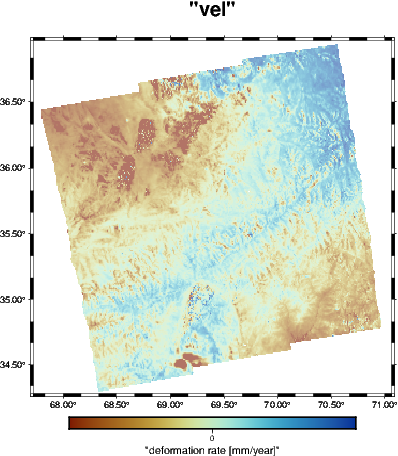

In [101]:
# test Milan nc reading code
import xarray as xr
xr.set_options(keep_attrs=True)

def pygmt_plot(grid, title, label='deformation rate [mm/year]', lims=[-25, 10],
               cmap="roma", photobg=False, plotvec=None):
    ''' Function to generate (nice) plot of given grid using pyGMT
    
    Args:
        grid (xr.DataArray): input grid to plot
        title (str):  title (note too long title will disbalance the figure)
        label (str):  label below the colour scale
        lims (list):  colour scale limits
        cmap (str):   colour scale map (try 'vik' for E-W)
        photobg (bool): will plot orthophotomap as the background (if False, DEM relief is used)
        plotvec (geopandas etc): will plot vector data to the map, using pyGMT defaults
    
    Returns:
        pygmt.figure.Figure
    '''
    try:
        grid = grid.load()
    except:
        print('error loading the input dataarray to memory')
        return False
    # try cmap 'vik' for E-W
    #
    # grid = a['U'].where(a.mask < 5) - 10
    # topo_data = '@earth_relief_03s' #3 arc second global relief (SRTM3S)
    topo_data = '@earth_relief_01s'  # 3 arc second global relief (SRTM3S)

    minlon, maxlon = float(np.min(grid.lon)), float(np.max(grid.lon))
    minlat, maxlat = float(np.min(grid.lat)), float(np.max(grid.lat))

    fig = pygmt.Figure()
    pygmt.config(FORMAT_GEO_MAP="ddd.xx") #, MAP_FRAME_TYPE="plain")
    projection = "M13c" # 'R13c' for Robinson etc.
    region = [minlon, maxlon, minlat, maxlat]
    fig.basemap(region=region, projection=projection, frame=["af", '+t"{0}"'.format(title)])

    if photobg:
        import contextily as ctx
        sourcetiles = ctx.providers.Esri.WorldImagery
        fig.tilemap(
            region=region, projection=projection,
            # region=[-157.84, -157.8, 21.255, 21.285],
            # projection="M12c",
            # Set level of details (0-22)
            # Higher levels mean a zoom level closer to the Earth's
            # surface with more tiles covering a smaller
            # geographic area and thus more details and vice versa
            # Please note, not all zoom levels are always available
            zoom=14,
            # Use tiles from OpenStreetMap tile server
            source=sourcetiles
        )
        pygmt.makecpt(cmap=cmap, series=lims, background=True)
        fig.grdview(grid=grid, cmap=True, projection=projection, surftype='c', transparency=40)
    else:
        pygmt.makecpt(cmap="gray", series=[-8000, 8000, 1000], continuous=True)
        fig.grdimage(
            grid=topo_data,
            cmap=True,
            region=[minlon, maxlon, minlat, maxlat],
            projection=projection,
            shading=True,
            frame=True
        )
        pygmt.makecpt(cmap=cmap, series=lims, background=True)
        fig.grdimage(grid=grid, cmap=True, projection=projection, frame=True, transparency=40)
    #
    fig.coast(shorelines=True, projection=projection)
    if type(plotvec) != type(None):
        fig.plot(plotvec, projection=projection, region=region)
    fig.colorbar(frame='a10+l"{}"'.format(label))
    # fig.show()
    return fig

a=xr.open_dataset("bin/"+InSAR_NetCDF); vel=a["vel"]; pygmt_plot(vel, title="vel", lims=[-4,4])